In [1]:
import matplotlib.pyplot as plt

In [2]:
import json


In [3]:
with open("metadata.json", "r") as f:
    data = json.load(f)

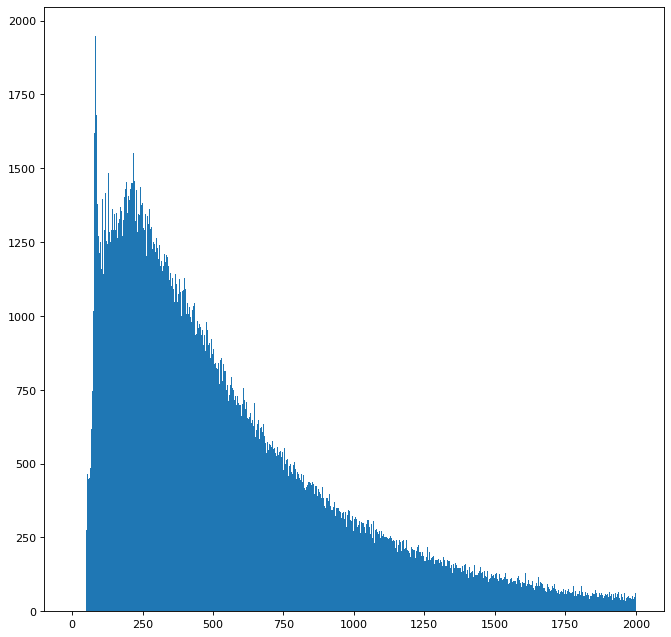

In [4]:
lengths = [len(d["abstract"]) for k,d in data.items()]
plt.figure(figsize=(10, 10), dpi=80)
plt.hist(lengths, bins=1000, range=(0,2000))
plt.show()

In [5]:
abstracts = [d["abstract"] for k,d in data.items()]

In [58]:
total = len(lengths)
less_512 = sum([i < 512 for i in lengths])
less_512/total

0.5618760075354767

In [53]:
import pandas as pd 


In [55]:
pd.DataFrame(lengths)[0].value_counts()

82      1004
83       944
84       943
81       928
86       918
        ... 
4245       1
3423       1
4562       1
4137       1
4221       1
Name: 0, Length: 4120, dtype: int64

In [6]:
for f in abstracts:
    if len(f) == 50:
        print("^",f, "$")

^ Paul Anderson voi tarkoittaa seuraavia henkilöitä: $
^ The Newz on Nazarethin studioalbumi vuodelta 2008. $
^ Tämä on luettelo televisiosarjan C.S.I. jaksoista. $
^ Andrew Murray voi tarkoittaa seuraavia henkilöitä: $
^ Hämyvälskäri ("Ctenochaetus tominiensis") on kala. $
^ Kobra tai Cobra voi tarkoittaa seuraavia asioita:  $
^ Hayden on muun muassa seuraavien henkilöiden nimi: $
^ Ehrenskiöld, Ehrensköld on sukunimi ja laivannimi: $
^ Tämä on luettelo julkaistuista Sharp X1 -peleistä. $
^ Pristis on saharauskujen heimoon kuuluva kalasuku. $
^ Tämä on luettelo televisiosarjan He-Man jaksoista. $
^ Tämä on luettelo Gremlin Graphicsin videopeleistä. $
^ Oxycheilinus on huulikalojen heimoon kuuluva suku. $
^ Tämä artikkeli käsittelee Maj Karman diskografiaa. $
^ Tämä on luettelo julkaistuista FM Towns -peleistä: $
^ Robert Thomas voi tarkoittaa seuraavia henkilöitä: $
^ Tämä on luettelo Linux Mintin julkaisuhistoriasta. $
^ Enijärvi on Lapissa Kemijärvellä sijaitseva järvi. $
^ Saunajär

In [60]:
sum([i < 100 for i in lengths])

25276

# Average sentence lengths and counts

In [63]:
!pwd

/home/olli/UniHY/fiwiki/wikiextractor


In [83]:
import glob 
import sys
import json 
def get_files():
    wiki_files = glob.glob("./text/*/wiki*")
    return wiki_files

def extract_introductions():
    wiki_files = get_files()
    intros = {}
    for i,wiki in enumerate(wiki_files):
        #print(f"Handling {i+1}/{len(wiki_files)}, {wiki=}")
        with open(wiki, "r") as f:
            data = f.read()
        intros = handle_wiki(data, intros)
        output_path = "metadata.json"
     
    return intros
    
    
def handle_wiki(data, intros):  
    for sample in data.splitlines():
        try:
            sample = json.loads(sample)
        except Exception as e:
            raise Exception(e)
        paper_id = sample["id"]
    
        intros[paper_id] = sample["introduction"]
    return intros

introductions = extract_introductions()

{"id": "465868", "revid": "20036022", "url": "https://fi.wikipedia.org/wiki?curid=465868", "title": "Lehtiruusuke", "classes": [{"match": "Luokka:Kasviorganologia", "class_name": "Kasviorganologia"}], "introduction": [["Lehtiruusuke on samasta kohtaa vartta eri suuntiin kasvaneiden lehtien muodostama kokonaisuus. Kasvien lehtiruusuke sijaitsee yleens\u00e4 varren alaosassa, aivan maanrajassa, jolloin sit\u00e4 voidaan nimitt\u00e4\u00e4 my\u00f6s tyviruusukkeeksi. Lehtiruusuke on tyypillinen muun muassa asterikasveilla (Asteraceae) ja ananaskasveilla (Bromeliaceae). ", "Jotkut, yleens\u00e4 kaksivuotiset kasvit saattavat muodostaa ensimm\u00e4isen\u00e4 vuonnaan vain lehtiruusukkeen, joka talvehtii vihre\u00e4n\u00e4 maanrajassa suojassa lumen alla, ja kasvattaa loput seuraavana vuonna. T\u00e4llaisia kasvilajeja ovat esimerkiksi ukontulikukka (\"Verbascum thapsus\"), rohtosormustinkukka (\"Digitalis purpurea\") ja kyl\u00e4neidonkieli (\"Echium vulgare\")."]], "introduction_references

SystemExit: 

/home/olli/.pyenv/versions/3.8.9/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [110]:
#!pip install nltk
import nltk
#
text = "Moikka! Miten menee? Jee, olipas kiva... Entäs sitten?"
import nltk

sent_text = nltk.sent_tokenize(text) # this gives us a list of sentences

print(sent_text)

['Moikka!', 'Miten menee?', 'Jee, olipas kiva... Entäs sitten?']


In [166]:
errs = []
article2sentencecount = {}
article2avgsentlen = {}
x = 1
for article_id, intro in introductions.items():
    if x % 50000 == 0:
        print(f"{x}/{len(introductions)}")
    try:
        text = " ".join(intro[0])
        sent_text = nltk.sent_tokenize(text)
        article2sentencecount[article_id] = len(sent_text)
        sentence_lengths = [len(sen) for sen in sent_text]
        article2avgsentlen[article_id] = sum(sentence_lengths)/(len(sent_text) + 0.00000001)
    except IndexError as e:
        errs.append(intro)
    except TypeError as te:
        raise Exception(te)
    x+=1
print(f"All errors are empty: {all(len(i) == 0 for i in errs)}")

50000/522669
100000/522669
150000/522669
200000/522669
250000/522669
300000/522669
350000/522669
400000/522669
450000/522669
500000/522669
All errors are empty: True


In [167]:
sorted(article2avgsentlen.items(), key=lambda item: item[1])

[('513502', 0.0),
 ('486563', 0.0),
 ('473961', 0.0),
 ('461882', 0.0),
 ('462232', 0.0),
 ('521981', 0.0),
 ('458532', 0.0),
 ('461269', 0.0),
 ('461406', 0.0),
 ('461540', 0.0),
 ('479081', 0.0),
 ('463518', 0.0),
 ('515477', 0.0),
 ('490340', 0.0),
 ('493384', 0.0),
 ('462335', 0.0),
 ('494013', 0.0),
 ('467524', 0.0),
 ('41885', 0.0),
 ('41892', 0.0),
 ('41893', 0.0),
 ('41894', 0.0),
 ('41895', 0.0),
 ('41896', 0.0),
 ('41898', 0.0),
 ('41899', 0.0),
 ('41911', 0.0),
 ('41912', 0.0),
 ('41913', 0.0),
 ('41914', 0.0),
 ('41915', 0.0),
 ('41916', 0.0),
 ('41917', 0.0),
 ('41919', 0.0),
 ('41920', 0.0),
 ('41921', 0.0),
 ('41922', 0.0),
 ('41924', 0.0),
 ('41925', 0.0),
 ('41926', 0.0),
 ('41927', 0.0),
 ('41928', 0.0),
 ('36295', 0.0),
 ('36365', 0.0),
 ('36367', 0.0),
 ('36369', 0.0),
 ('36371', 0.0),
 ('36373', 0.0),
 ('36375', 0.0),
 ('36376', 0.0),
 ('36377', 0.0),
 ('36442', 0.0),
 ('36443', 0.0),
 ('36444', 0.0),
 ('36445', 0.0),
 ('36446', 0.0),
 ('36447', 0.0),
 ('36448', 0.

In [165]:
" ".join(introductions["1258427"][0])

'  Ahnusjärvi on Varsinais-Suomessa Laitilan Mudaisilla oleva järvi, joka kuuluu Sirppujoen vesistöön, joka kuuluu Sirppujoen vesistön Lukkionjoen valuma-alueeseen.'

# Sentence count 

(array([3.71400e+03, 1.16833e+05, 1.29531e+05, 1.06072e+05, 6.61770e+04,
        3.28490e+04, 1.51030e+04, 6.72400e+03, 3.20300e+03, 1.53600e+03,
        7.83000e+02, 4.18000e+02, 2.04000e+02, 9.10000e+01, 6.70000e+01,
        2.50000e+01, 1.50000e+01, 8.00000e+00, 6.00000e+00, 8.00000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

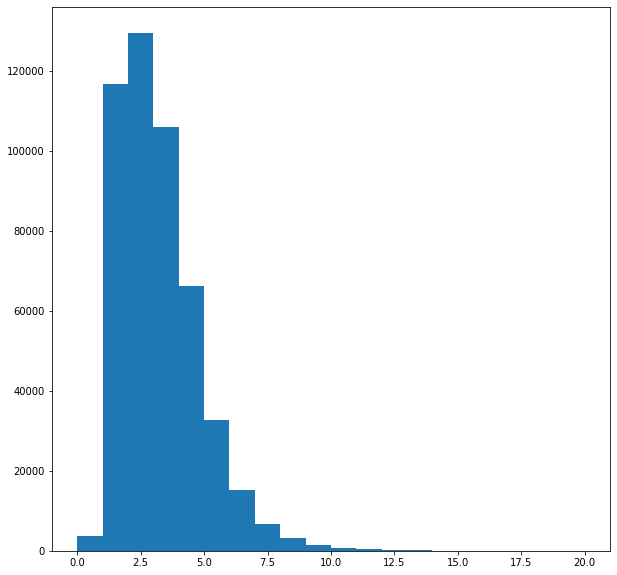

In [151]:
plt.figure(figsize=(10,10))
plt.hist(article2sentencecount.values(), range=(0,20), bins=20)

# Average sentence length


(array([3.7370e+03, 9.2000e+01, 1.2500e+02, 5.3900e+02, 1.1080e+03,
        2.1830e+03, 4.2340e+03, 7.1390e+03, 1.3738e+04, 1.8491e+04,
        2.7020e+04, 3.2340e+04, 3.7224e+04, 4.3396e+04, 3.8859e+04,
        3.7715e+04, 3.2972e+04, 3.1078e+04, 2.5342e+04, 2.1783e+04,
        1.7809e+04, 1.5812e+04, 1.2080e+04, 1.0293e+04, 8.3380e+03,
        6.7930e+03, 6.1910e+03, 4.5760e+03, 3.8530e+03, 3.0900e+03,
        2.8470e+03, 2.0210e+03, 1.7180e+03, 1.4360e+03, 1.3210e+03,
        9.4500e+02, 8.1500e+02, 6.5100e+02, 5.4500e+02, 5.5300e+02,
        3.6600e+02, 3.2600e+02, 2.8200e+02, 2.8500e+02, 1.8900e+02,
        1.5800e+02, 1.4900e+02, 1.1500e+02, 1.1000e+02, 7.5000e+01,
        6.6000e+01, 6.0000e+01, 6.1000e+01, 4.6000e+01, 4.0000e+01,
        3.2000e+01, 3.6000e+01, 2.6000e+01, 2.3000e+01, 1.1000e+01,
        1.6000e+01, 1.5000e+01, 8.0000e+00, 9.0000e+00, 7.0000e+00,
        1.3000e+01, 8.0000e+00, 4.0000e+00, 6.0000e+00, 6.0000e+00,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 1.00

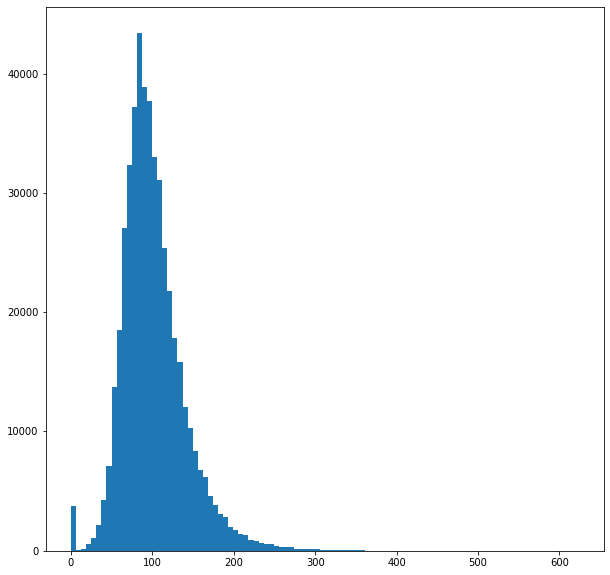

In [152]:
plt.figure(figsize=(10,10))
plt.hist(article2avgsentlen.values(), bins=100)

In [145]:
nltk.sent_tokenize("13. alppihiihdon maailmanmestaruuskilpailut järjestettiin Ruotsin Åressa 1.–7. maaliskuuta 1954.")

['13. alppihiihdon maailmanmestaruuskilpailut järjestettiin Ruotsin Åressa 1.–7.',
 'maaliskuuta 1954.']

In [143]:
for i, n in article2avgsentlen.items():
    if n < 50:
        print(introductions[i])
        print(article2sentencecount[i])
        print("\n")

[['13. alppihiihdon maailmanmestaruuskilpailut järjestettiin Ruotsin Åressa 1.–7. maaliskuuta 1954.']]
2


[['Kullervo Koivisto (oik. Heikki Mattinen) on suomalainen pornoelokuvien tuottaja ja kuvaaja.']]
2


[['Akepat ("Loxops") on peippojen heimoon kuuluva varpuslintusuku. Sukuun kuuluu lajia. ', 'Akepalajeja elää ainoastaan Havaijin saaristossa Tyynellämerellä. Akepat ovat pieniä, värikkäitä lintuja, jotka syövät enimmäkseen hyönteisiä ja hämähäkkejä sekä mettä. Ne elävät kosteissa metsissä ja ovat uhanalaisia elinympäristön tuhoutumisen takia.']]
2


[[' ', 'Casino Helsinki (aiemmin Grand Casino Helsinki) on Helsingin Kluuvissa sijaitseva kasino. Kasinon omistaa Veikkaus.', 'Kasino on auki 363 päivänä vuodessa, kello 13:00–04:00. Kasinolla on noin 300 peliautomaattia sekä yli 20 pelipöytää ja pokerihuone. Kasinolla työskentelee noin 200 henkeä. Vuonna 2009 kasinolla kävi noin 305 000 asiakasta ja liikevaihto oli noin 30 miljoonaa euroa. Kasino on kooltaan 2600 neliötä ja se toimii 

0


[['John Calhoun voi tarkoittaa ainakin seuraavia:']]
1


[[' ', 'Yleinen kansankokous (arabiaksi: المؤتمر الشعبي العام \u200e; "Al-Mo\'tamar Ash-Sha\'abiy Al-\'Aam") on jemeniläinen puolue. Vuoden 2003 parlamenttivaaleissa se oli diktatuuri Jemenin suurin puolue. Vaaleja ei ole järjestetty sen jälkeen. Puolueen puheenjohtajana on 7. tammikuuta 2018 lähtien toiminut Sadek Amin Abu Raas. ']]
0


[[' ', 'Voitto (Vic) Pokela (18. elokuuta 1924 Suomi – 29. lokakuuta 2010 Australia) oli australiansuomalainen pappi. Hänen teoksensa "Jälkiä Australian sannassa" (1995) on tunnetuimpia australiansuomalaisten julkaisemia kirjoja', 'Pokela muutti Australiaan Tasmaniaan 1959. Hän teki aluksi kirvesmiehen töitä Hobartin kirjaston rakennustyömaalla. Perhe tuli perässä myöhemmin. Pokela oppi nopeasti englannin ja ryhtyi myöhemmin opiskelemaan. Hän valmistui luterilaiseksi papiksi ja oli ensimmäinen Australiassa pappiskoulutuksen saanut suomalainen. Viimeiset vuotensa Pokela asui Queenslandissa. Po

1


[['Sm4 on VR-Yhtymän käyttämä sähkökäyttöinen lähijuna. Sm4-junasarjan lempinimi on "Pupu".', 'Junia tilattiin ensin 10 kappaletta. Ne valmisti espanjalainen Construcciones y Auxiliar de Ferrocarriles (CAF) ja ensimmäiset yksiköt otettiin käyttöön vuonna 1999. Kesäkuussa 2002 VR tilasi junia 20 yksikköä lisää ja ne toimitettiin vuosina 2004 ja 2005. Nämä yksiköt valmisti ranskalainen Alstom. Sähköjärjestelmät kaikkiin yksiköihin on valmistanut italialainen Ferroviaria Elettromeccanica Parizzi, joka oli aluksi Fiatin ja sittemmin vuodesta 2000 Alstomin omistuksessa.', 'Junat hankittiin korvaamaan Sm1- ja Sm2-yksiköt pääkaupunkiseudun pitkillä linjoilla Riihimäelle ja Lahteen. Niitä käytettiin alussa rinnakkain vanhojen Sm1- ja Sm2-yksiköiden kanssa, mutta nykyään kaikki R- ja Z-junat ajetaan lähes poikkeuksetta Sm4-yksiköillä. Kuitenkin Helsingin ja Kouvolan väliset Z-junia ajetaan myös Sm2-yksiköillä. Sm4-junat on teknisesti ja sisätilaratkaisuiltaan tarkoitettu pitkille reiteille,

2


[['Siptah oli Egyptiä 19. dynastian aikaan vuosina 1194–1188 eaa. hallinnut faarao.', 'Siptahin isä oli hänen edeltäjänsä faarao Seti II ja kuningatar Tiaa oli hänen äitinsä. Siptah nousi lailliseksi kruununperijäksi Seti II:n ja Takhatin pojan Seti-merenptahin kuoltua. Seti II:n kuoleman jälkeen hän nousi valtaan. Tällöin hän oli vielä hyvin nuori ja mahdollisesti jollain tavoin kehitys- tai liikuntavammainen, sillä hänen haudasta löydetty jalkansa oli epämuodostunut (mm. CP-vammaa on esitetty syyksi). On epäselvää hallitsiko Siptah koskaan täydellisesti, sillä kuningatar Tausret sekä kansleri Bay vaikuttivat suuresti hänen hallitusaikanaan, ehkä jopa toimivat kanssahallitsijoina. Siptah kuoli kuudentena hallitusvuonnaan, jolloin kuningatar Tausret otti täyden vallan.', 'Siptah on haudattu Kuninkaiden laaksoon (hauta KV47). Hautaan on haudattu kaksi henkilöä, joista toisen oletetaan olevan itse Siptah ja toisen hänen äitinsä kuningatar Tiaa. Haudasta löytyi myös Siptahin epämuodos

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

